## <font color=Black> Making plots of Single-variable Spatial data </font>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading and cleaning the dataset

In [17]:
#using na_values ='na' to instruct read_csv to replace `na` by `np.nan`
notclean = pd.read_csv("AB_NYC_2019.csv",na_values='na')

In [18]:
#verify the shape
notclean.shape

(48895, 16)

In [19]:
#to see column labels
notclean.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [20]:
#Check some rows
notclean[:5]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [21]:
#to view the columns with null in them, and how many nulls are there in each column
notclean.isnull().sum()  

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Interested in `room_type`  and `price`  columns which have 0 missing values. So no further cleaning is needed. 

----------

##### Plot a Donut chart

In [22]:
#To Calculate the frequency of each room type
df = notclean['room_type'].value_counts()
room_type_freq = pd.DataFrame(df)

label = room_type_freq.index.tolist()
color = ['purple', 'skyblue', 'red']

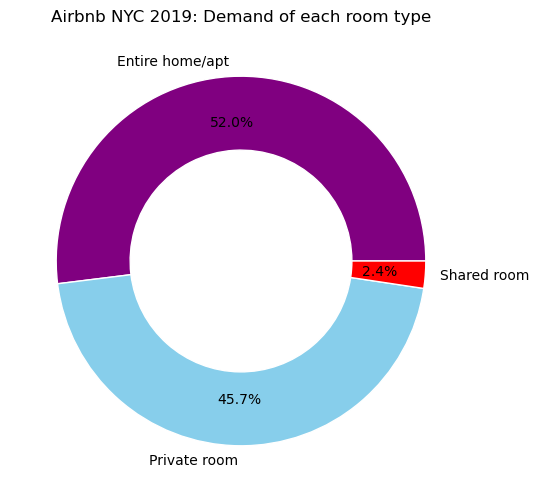

In [23]:
#plot the demand of each room type
plt.figure(figsize=(6,6))

plt.pie(room_type_freq['room_type'], labels=label, labeldistance=1.08, autopct='%1.1f%%',
        pctdistance=0.75, colors=color, radius=1, wedgeprops=dict(width=0.4, edgecolor='w'))

plt.title('Airbnb NYC 2019: Demand of each room type')

plt.show()

As you can see, `Entire home/apt` was reserved the most and the `Shared room` is the least

In [24]:
#calculating the average price of each room type
room_type_price = notclean[['room_type', 'price']]

average_price = room_type_price.groupby('room_type', as_index=False)['price'].mean()

average_price


,room_type,price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


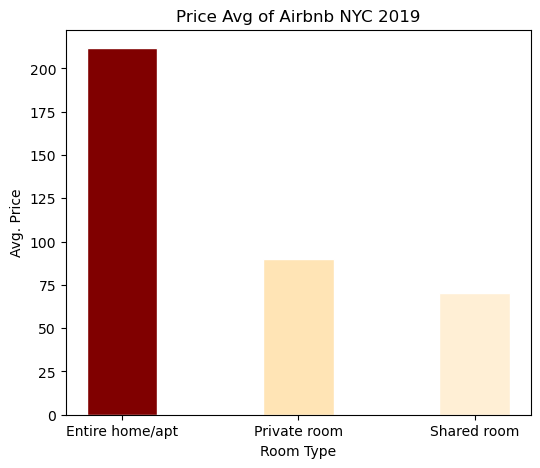

In [26]:
#plot the average price
room_type_index = np.arange(len(room_type_freq))

color2 = ['maroon', 'moccasin', 'papayawhip']

plt.figure(figsize=(6,5))

bar_width = 0.4
plt.bar(room_type_index, average_price['price'], width=bar_width, color=color2, edgecolor='White')

plt.xticks(room_type_index, label, rotation=0)

plt.title('Price Avg of Airbnb NYC 2019')
plt.ylabel('Avg. Price')
plt.xlabel('Room Type')

plt.show()
